## 🔧 GSO-YOLO: Global Stability Optimization YOLO

This notebook implements **GSO-YOLO**, a YOLOv8-based object detection model proposed in the paper  
**"GSO-YOLO: Global Stability Optimization YOLO for Construction Site Detection"** ([arXiv:2407.00906](https://arxiv.org/abs/2407.00906)).

It integrates:
- **GOM**: Global attention module to enhance feature extraction.
- **SCM**: Temporal smoothing for more stable detection.
- **AIoU Loss** *(optional)* for better localization.

We include all model variants used in the paper’s ablation study:

📦 Base repo: [Ultralytics YOLOv8](https://github.com/ultralytics/ultralytics)  
Experiment goal: Measure performance improvements.

---

## 📁 1. Setup

Clone the fork of YOLOv8 and install dependencies.

```
!git clone https://github.com/DoniaGasmii/gso-yolo-v8.git
```


In [7]:
# Mount Google Drive (dataset and yolov8-gso.yaml are there)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
%cd /content/drive/MyDrive/DISAL/gso-yolo-v8

/content/drive/MyDrive/DISAL/gso-yolo-v8


In [3]:
!pip install -e .  # install in editable mode

Obtaining file:///content/drive/MyDrive/DISAL/gso-yolo-v8
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 18.7 MB/s eta 0:00:00
  Building editable for ultralytics (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.3.170-0.editable-py3-none-any.whl size=23171 sha256=0c93b0c76a9f6dd4d8943dae9c3c0056c7ae06002b52fa74b98466c80e9c67c6
  Stored in directory: /tmp/pip-ephem-wheel-cache-wq0flfjt/wheels/d5/43/08/ac8762dfdb2e4bf809d3762529202885307e9fab464cc5100a
Successfully built ultralytics


In [13]:
import sys
sys.path.append("/content/drive/MyDrive/DISAL/hazard-detection-project")  # Add root to access utils

from utils.results_analysis.plots import plot_metric_comparison

In [9]:
data_path = "/content/drive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_0.2k/data.yaml"
save_dir = "/content/drive/MyDrive/DISAL/Disal-Data/runs/detect/gso-yolo-light"

## 📦 2. Load Dataset
In this section, we load the dataset. It should be in YOLO format with the following structure:
```
datasets/data/
├── images/
│ ├── train/
│ ├── val/
├── labels/
│ ├── train/
│ ├── val/
├── data.yaml
```

## ⚙️ 3. Train YOLOv8 (Baseline)

We start by training the original YOLOv8 model using the `yolov8.yaml` configuration on the helmets dataset.

In [ ]:
!yolo detect train \
    data={data_path} \
    model=yolov8.yaml \
    epochs=180 \
    imgsz=640 \
    project={save_dir} \
    name=baseline_yolov8

WARNING ⚠️ no model scale passed. Assuming scale='n'.
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_0.2k/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=180, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=baseline_yolov82, nbs=64, nms=False, opset=None, 

## ⚙️ 4. Train YOLOv8 + GAM

Now we train the modified YOLOv8 model that includes the **GAM module**, using the `yolov8-gam.yaml` config file.


In [12]:
!yolo detect train \
    data={data_path} \
    model=yolov8-gam.yaml \
    epochs=180 \
    imgsz=640 \
    project={save_dir} \
    name=gam_yolov8

WARNING ⚠️ no model scale passed. Assuming scale='n'.
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_0.2k/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=180, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8-gam.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=gam_yolov82, nbs=64, nms=False, opset=None, optimiz

## 📊 5. Evaluate Results

We compare the performance of both models in terms of:
- mAP50
- mAP50-95
- Precision
- Recall


In [15]:
# Baseline
!yolo detect val model=/content/drive/MyDrive/DISAL/Disal-Data/runs/detect/gso-yolo-light/baseline_yolov8/weights/best.pt data={data_path}

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cpu CPU (Intel Xeon 2.00GHz)
YOLOv8 summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 31.1±4.9 MB/s, size: 38.4 KB)
val: Scanning /content/drive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_0.2k/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100% 39/39 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:01<00:00,  1.81it/s]
                   all         39        154      0.867      0.766      0.846      0.438
Speed: 1.0ms preprocess, 28.4ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /content/drive/MyDrive/DISAL/gso-yolo-v8/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [16]:
# GAM
!yolo detect val model=/content/drive/MyDrive/DISAL/Disal-Data/runs/detect/gso-yolo-light/gam_yolov82/weights/best.pt data={data_path}

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cpu CPU (Intel Xeon 2.00GHz)
YOLOv8-gam summary (fused): 80 layers, 7,407,379 parameters, 0 gradients, 22.5 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 32.3±7.1 MB/s, size: 38.0 KB)
val: Scanning /content/drive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_0.2k/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100% 39/39 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.32it/s]
                   all         39        154      0.879      0.754      0.832      0.456
Speed: 1.0ms preprocess, 43.4ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /content/drive/MyDrive/DISAL/gso-yolo-v8/runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


## 📈 6. Results & Discussion

| Model        | mAP50           | mAP50-95            | Precision           | Recall          | Training Time (h) | Inference Time (ms) |
| ------------ | --------------- | ------------------- | ------------------- | --------------- | ----------------- | ------------------- |
| YOLOv8       | **0.846**       | 0.438               | 0.867               | **0.766**       | **0.086**         | **28.4 ms**         |
| YOLOv8 + GAM | 0.832 (↓ 1.65%) | **0.456** (↑ 4.11%) | **0.879** (↑ 1.38%) | 0.754 (↓ 1.57%) | 1.292 (↑ 1403%)   | 43.4 ms (↑ 52.8%)   |


💬 **Observations**:  
- Does GAM improve localization or generalization?
- Any trade-offs in training time or model size?

---

[Info] Plot saved to: /content/drive/MyDrive/DISAL/Disal-Data/runs/detect/gso-yolo-light/map50_comparison.png


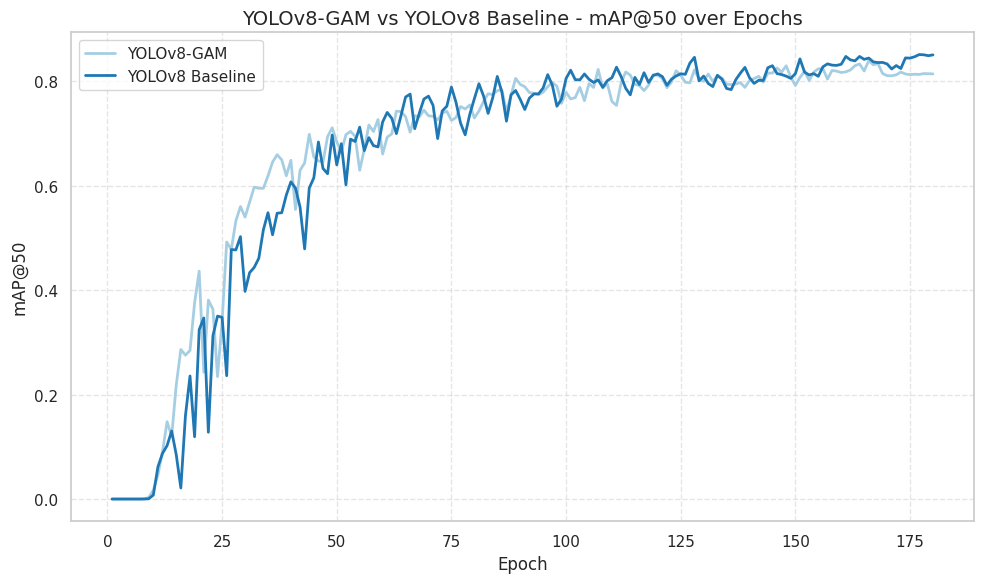

In [14]:
# Define paths to the result CSVs
csv_paths = [
    "/content/drive/MyDrive/DISAL/Disal-Data/runs/detect/gso-yolo-light/gam_yolov82/results.csv",
    "/content/drive/MyDrive/DISAL/Disal-Data/runs/detect/gso-yolo-light/baseline_yolov8/results.csv"
]

# Define plot settings
metric_column = "metrics/mAP50(B)"
labels = ["YOLOv8-GAM", "YOLOv8 Baseline"]
title = "YOLOv8-GAM vs YOLOv8 Baseline - mAP@50 over Epochs"
ylabel = "mAP@50"
save_path = "/content/drive/MyDrive/DISAL/Disal-Data/runs/detect/gso-yolo-light/map50_comparison.png"

# Generate the plot
plot_metric_comparison(
    csv_paths=csv_paths,
    metric_column=metric_column,
    labels=labels,
    title=title,
    ylabel=ylabel,
    save_path=save_path
)